# Linear Autoencoder with 64-dim Latent Vector

In [1]:
import numpy as np
from eureka.activation import relu, sigmoid, sigmoid_prime, softmax
from eureka.utils import one_hot_encoder, dataloader
import eureka.losses as losses
import eureka.optim as optim
import eureka.nn as nn
import datasets.mnist

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset  
train_x, train_y = datasets.mnist.load_dataset(download=True, train=True)
test_x, test_y = datasets.mnist.load_dataset(download=True, train=False)

# Preprocess Dataset
x = train_x.reshape(train_x.shape[0], -1)
x_test = test_x.reshape(test_x.shape[0], -1)
num_samples = x.shape[0]

# Prepare the dataloader
trainloader = dataloader(x, x, batch_size=64, shuffle=True)
testloader = dataloader(x_test, x_test, batch_size=64, shuffle=True)

Found and verified data/t10k-images-idx3-ubyte.gz
Found and verified data/t10k-labels-idx1-ubyte.gz
Found and verified data/train-images-idx3-ubyte.gz
Found and verified data/train-labels-idx1-ubyte.gz
Found and verified data/t10k-images-idx3-ubyte.gz
Found and verified data/t10k-labels-idx1-ubyte.gz
Found and verified data/train-images-idx3-ubyte.gz
Found and verified data/train-labels-idx1-ubyte.gz


In [3]:
# Discriminator Model
model = nn.Sequential([
    nn.Linear(784, 64),
    nn.Sigmoid(),
    nn.Linear(64, 784),
    nn.Sigmoid()
])

# Define the optimizer
optimizer = optim.Adam(model, lr=0.0002)

# Define Criterion/Loss function
criterion = losses.MSELoss()

In [4]:
# Helper file to compare real and genenrated images
def visualize(real_images, fake_images):
    fig = plt.figure(figsize=(25, 4))
    for index in np.arange(20):
        ax = fig.add_subplot(2, 20/2, index+1, xticks=[], yticks=[])
        if index < 10:
            ax.imshow(real_images[index], cmap='gray')
        else:
            ax.imshow(fake_images[index-10], cmap='gray')
        
    plt.show()

In [5]:
def train(model, optimizer):
    num_epochs = 50
    for epoch in range(1, num_epochs+1):
        print("Epoch: {}/{}\n==========".format(epoch, num_epochs))
        acc = 0
        batch_loss = 0
        
        for inputs, targets in trainloader:
            # Forward Propagation
            out = model.forward(inputs)

            # Compute loss
            batch_loss += criterion(out, targets)
            
            # Backprop of Loss Function
            back_var = criterion.backward()

            # Backprop within Model
            model.backward(back_var)

            # Optimization Step
            optimizer.step()
            
        # Visualization
        real_images = inputs.reshape(inputs.shape[0], 28, 28)[:10]
        fake_images = out.reshape(out.shape[0], 28, 28)[:10]
        visualize(real_images, fake_images)

        print("Loss: {:.6f}".format(batch_loss))
        
    return model

Epoch: 1/50


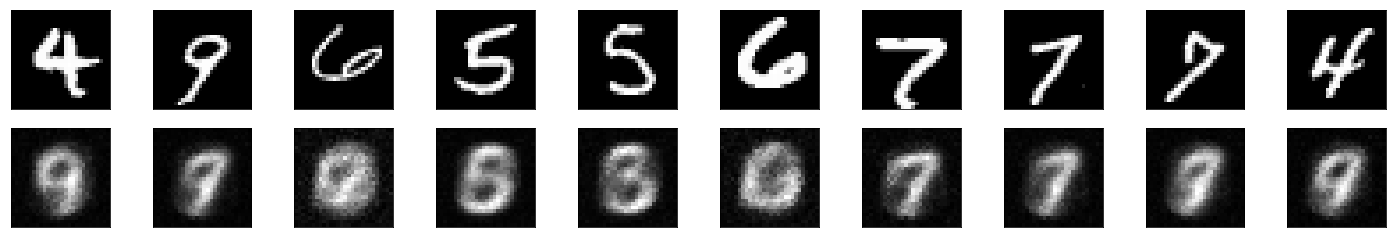

Loss: 29.317220
Epoch: 2/50


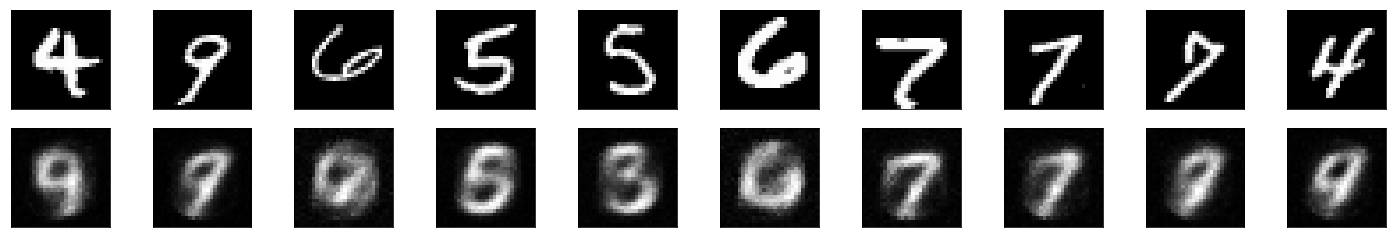

Loss: 21.121628
Epoch: 3/50


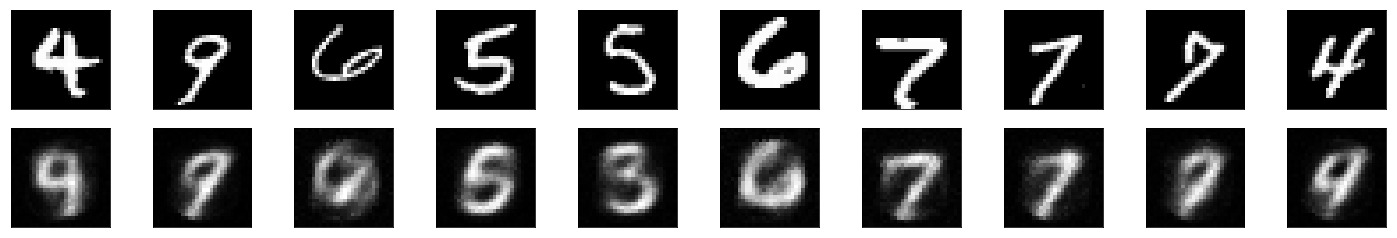

Loss: 17.959153
Epoch: 4/50


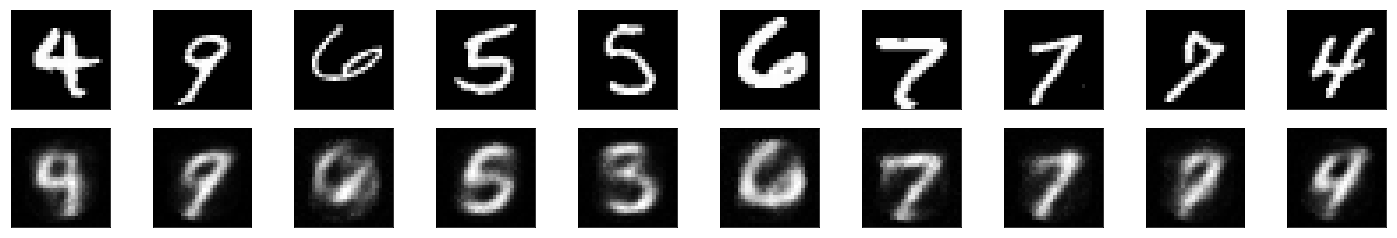

Loss: 15.731781
Epoch: 5/50


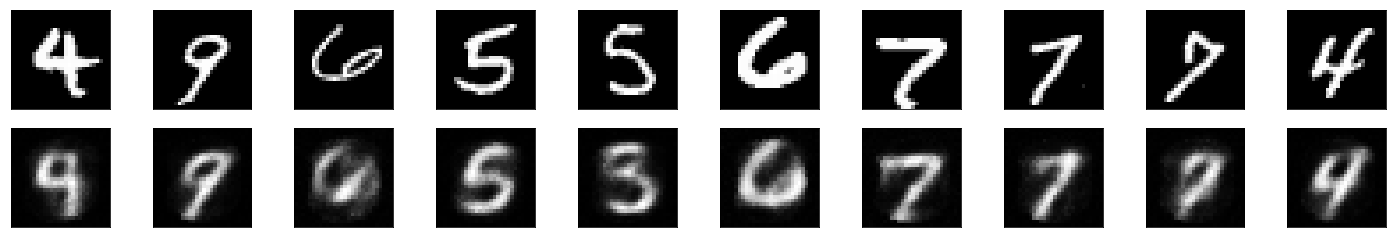

Loss: 13.976455
Epoch: 6/50


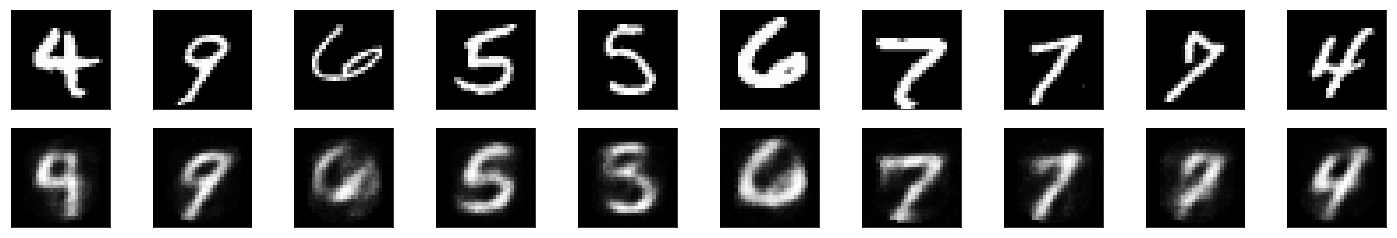

Loss: 12.551420
Epoch: 7/50


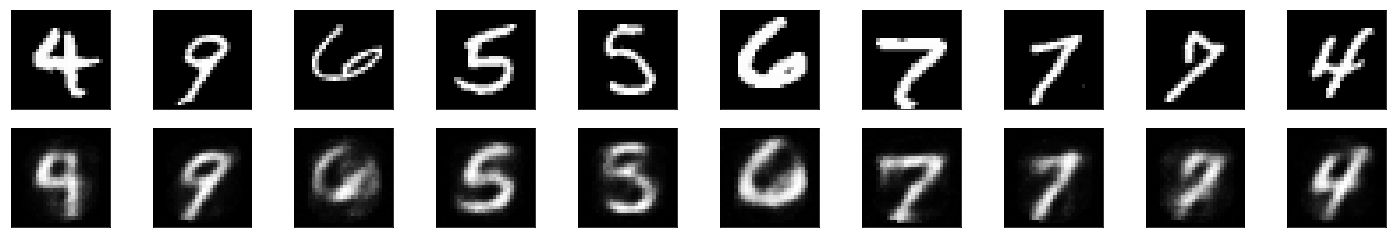

Loss: 11.405719
Epoch: 8/50


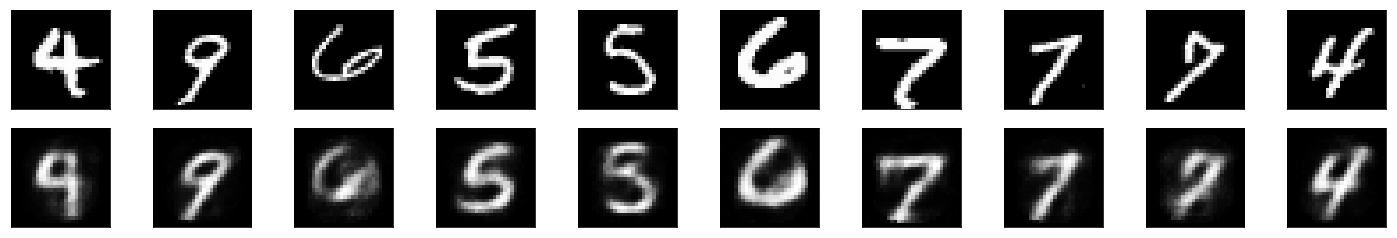

Loss: 10.470884
Epoch: 9/50


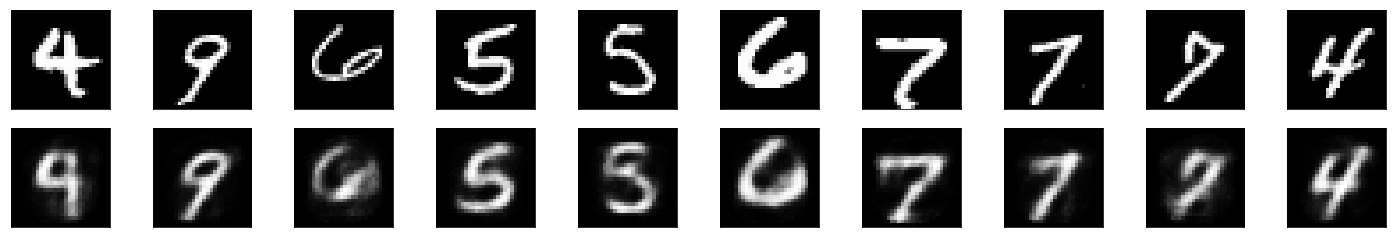

Loss: 9.677352
Epoch: 10/50


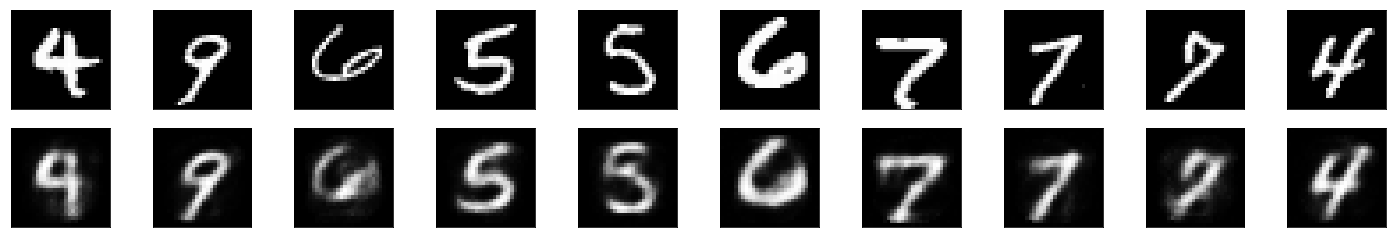

Loss: 8.948701
Epoch: 11/50


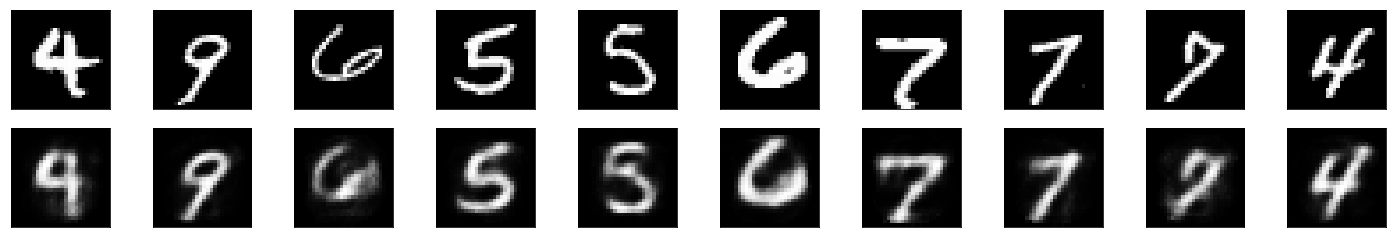

Loss: 8.306132
Epoch: 12/50


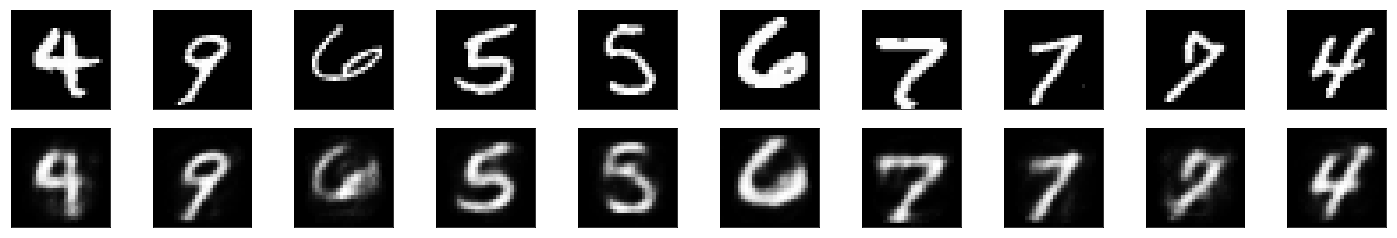

Loss: 7.752005
Epoch: 13/50


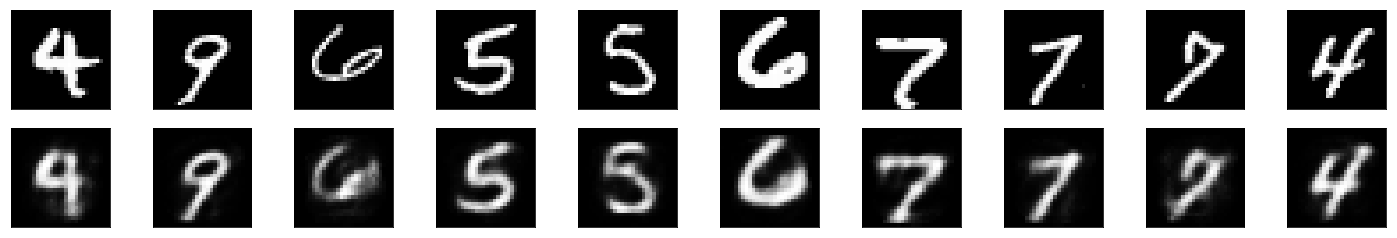

Loss: 7.251994
Epoch: 14/50


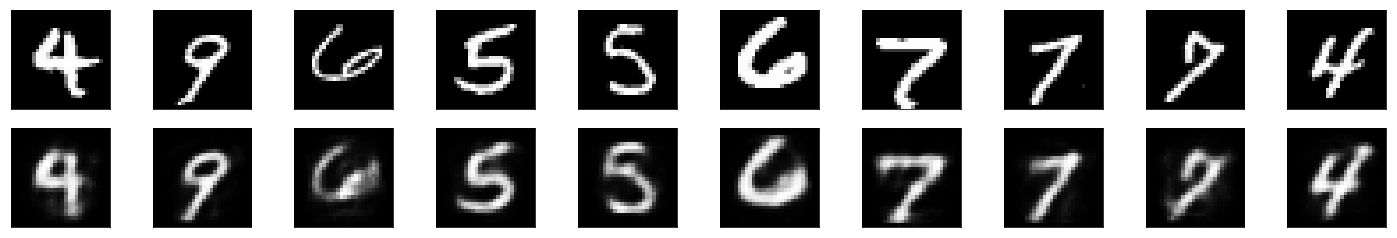

Loss: 6.810318
Epoch: 15/50


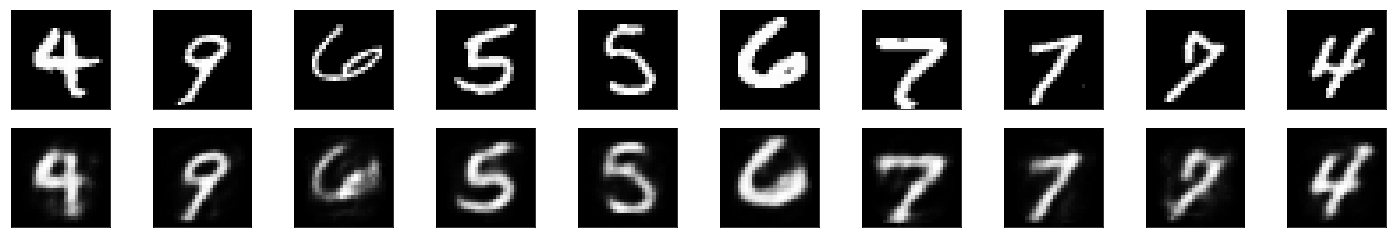

Loss: 6.421356
Epoch: 16/50


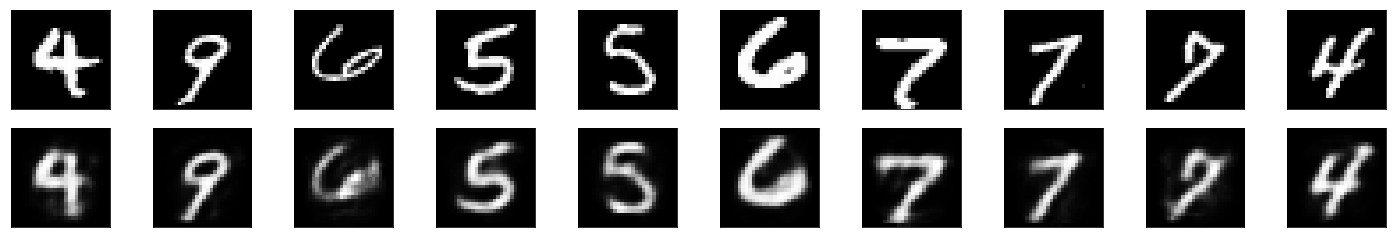

Loss: 6.077599
Epoch: 17/50


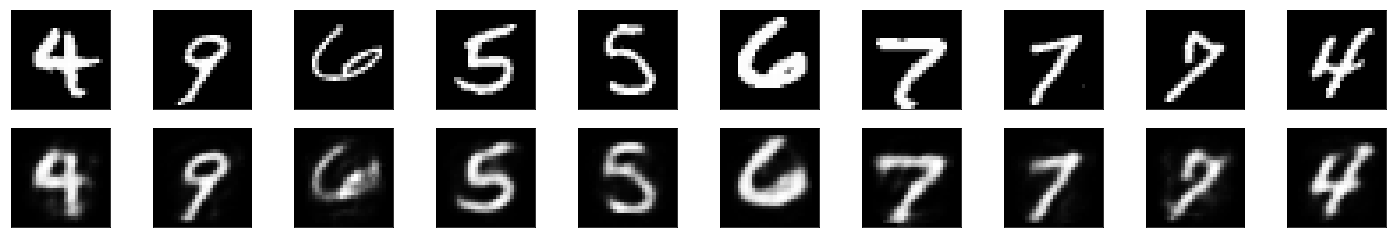

Loss: 5.774746
Epoch: 18/50


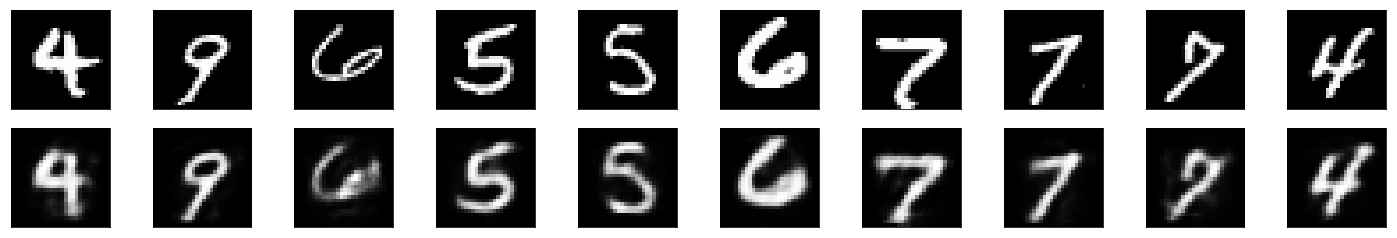

Loss: 5.494395
Epoch: 19/50


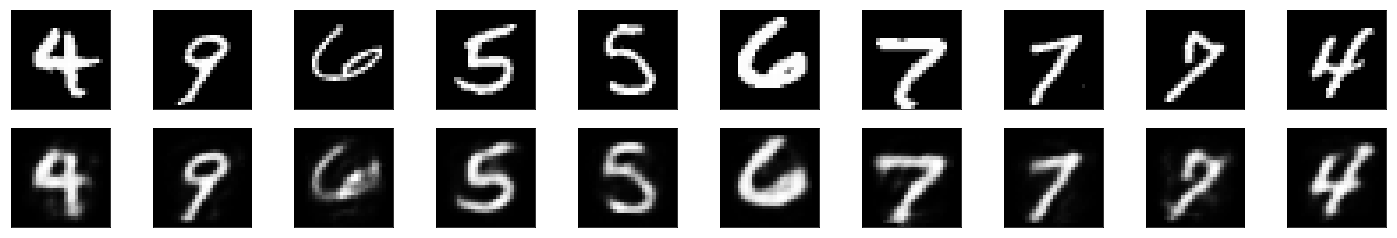

Loss: 5.240776
Epoch: 20/50


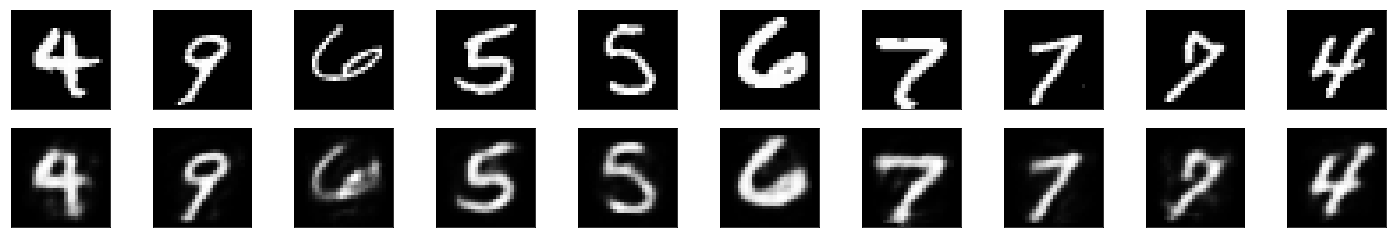

Loss: 5.012221
Epoch: 21/50


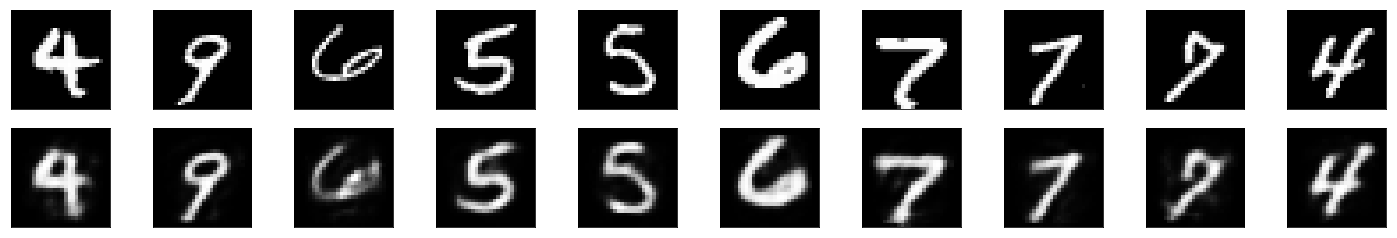

Loss: 4.809417
Epoch: 22/50


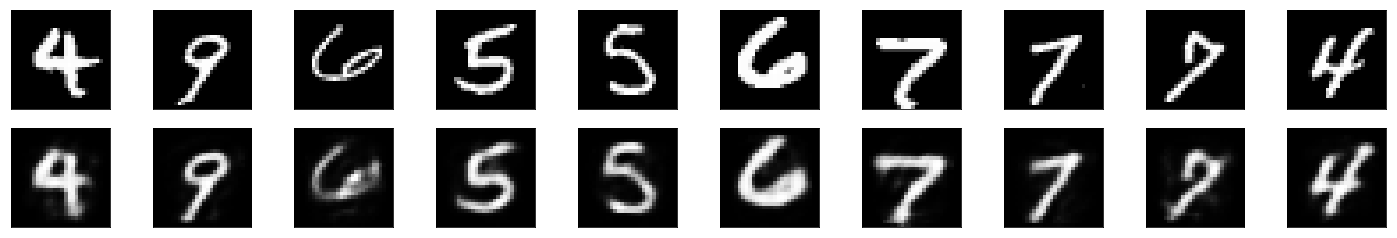

Loss: 4.629799
Epoch: 23/50


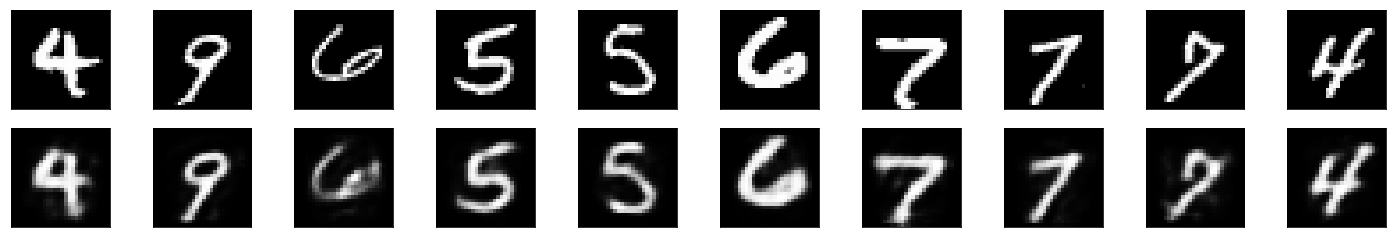

Loss: 4.467576
Epoch: 24/50


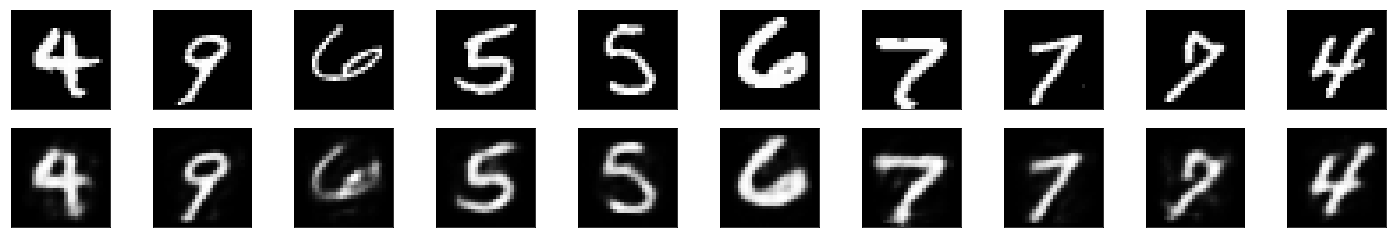

Loss: 4.320689
Epoch: 25/50


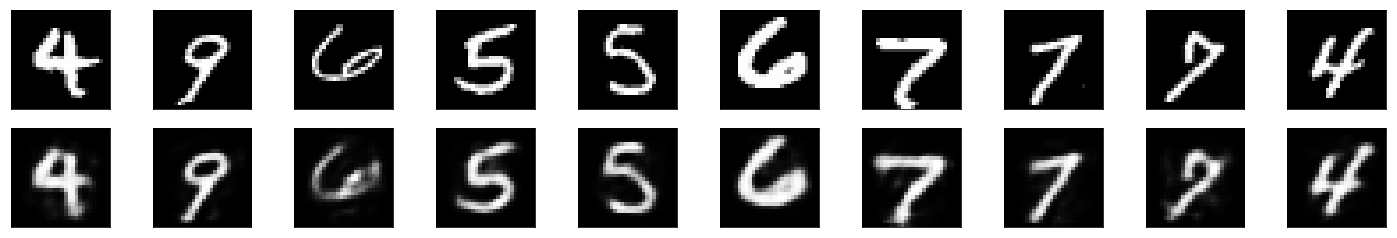

Loss: 4.187562
Epoch: 26/50


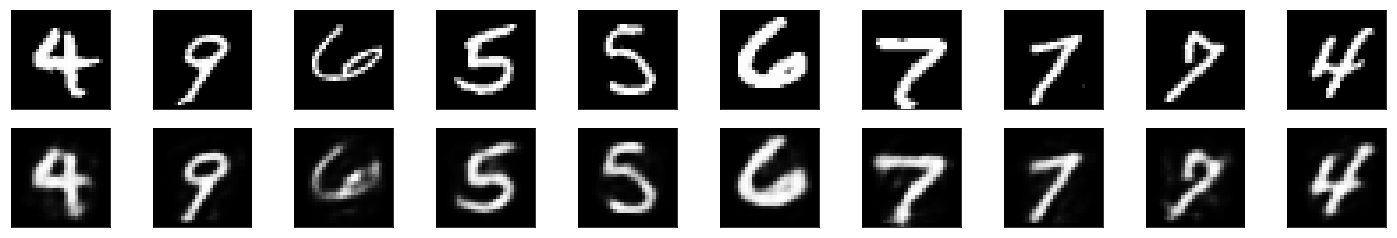

Loss: 4.066781
Epoch: 27/50


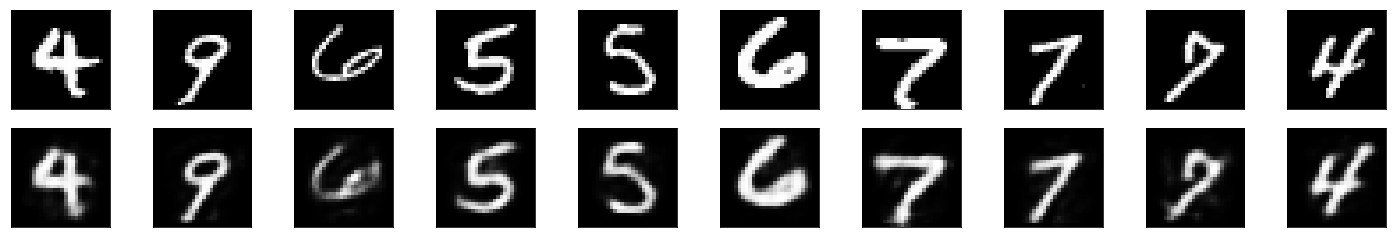

Loss: 3.956998
Epoch: 28/50


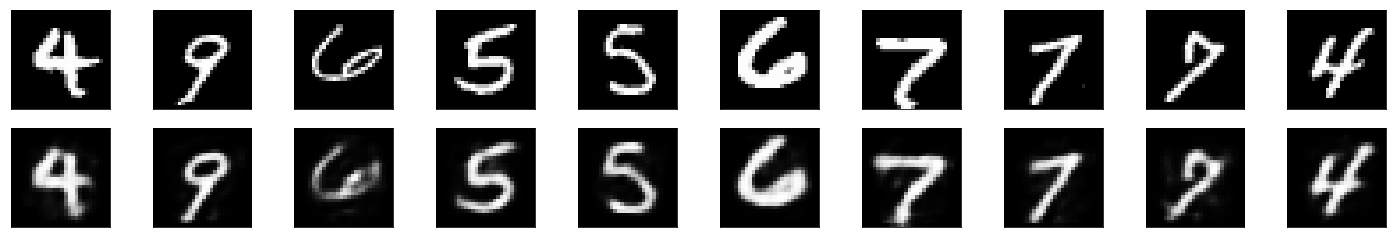

Loss: 3.856941
Epoch: 29/50


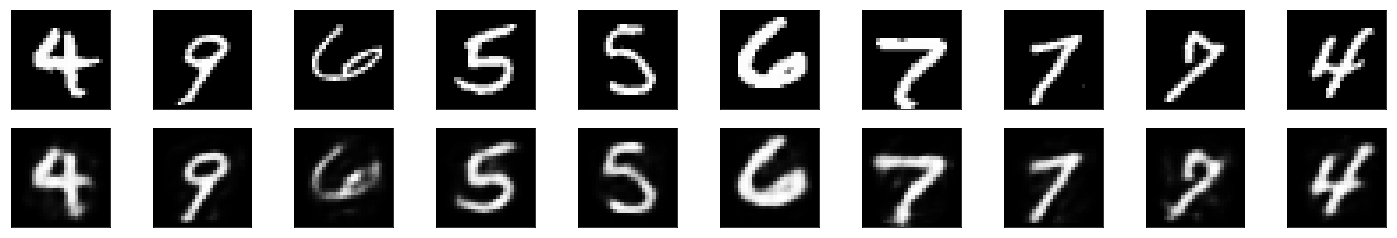

Loss: 3.765453
Epoch: 30/50


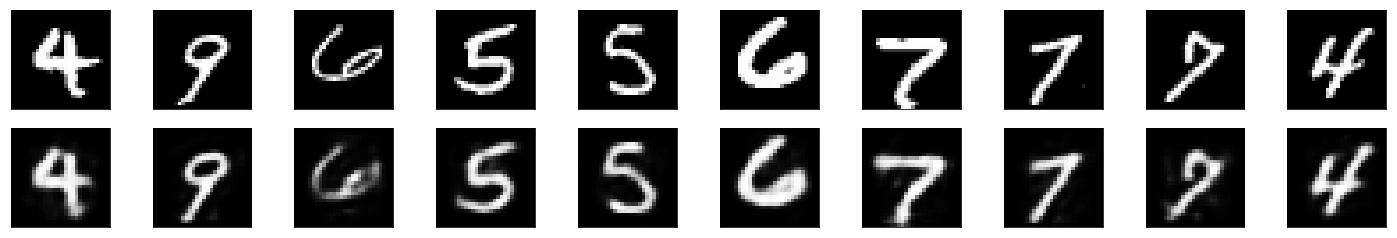

Loss: 3.681506
Epoch: 31/50


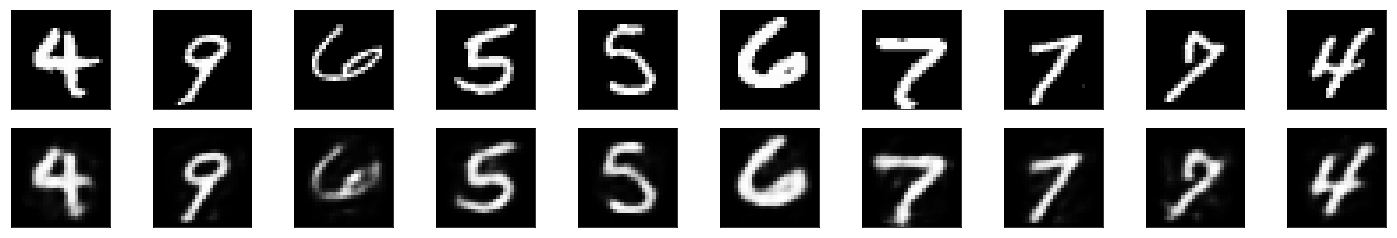

Loss: 3.604209
Epoch: 32/50


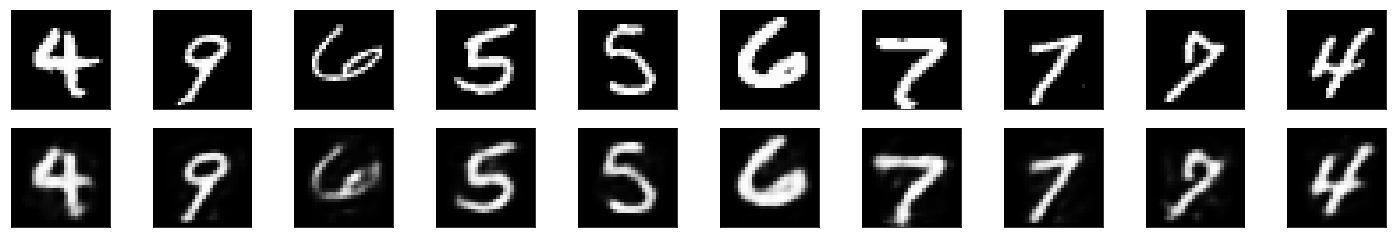

Loss: 3.532793
Epoch: 33/50


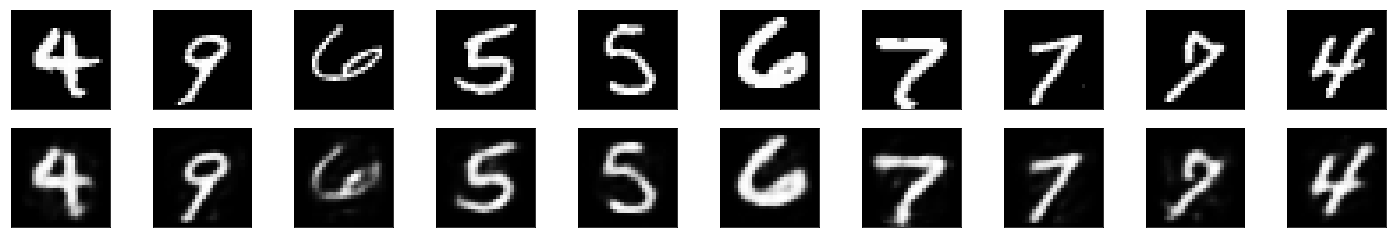

Loss: 3.466599
Epoch: 34/50


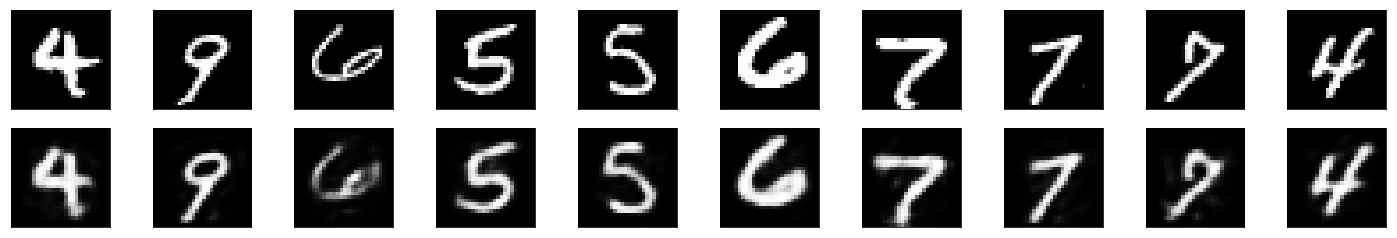

Loss: 3.405059
Epoch: 35/50


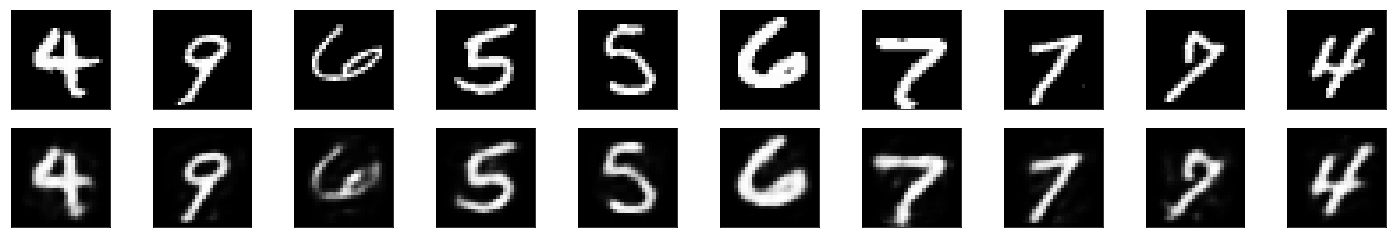

Loss: 3.347685
Epoch: 36/50


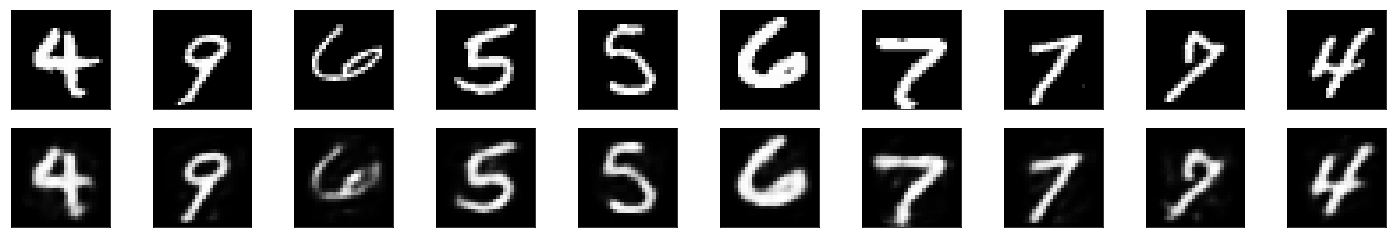

Loss: 3.294054
Epoch: 37/50


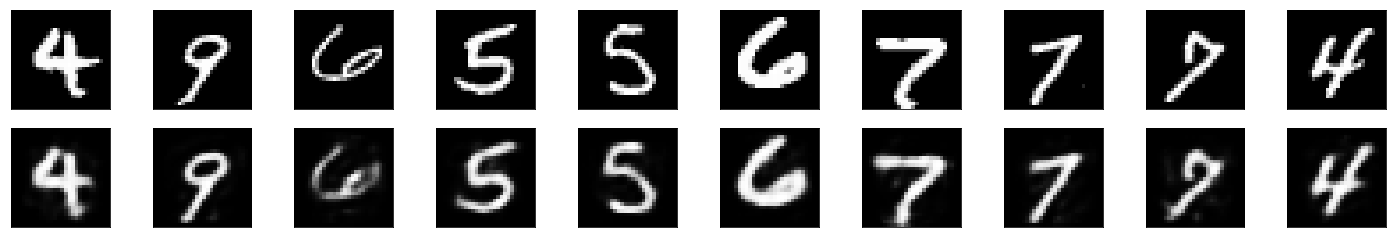

Loss: 3.243803
Epoch: 38/50


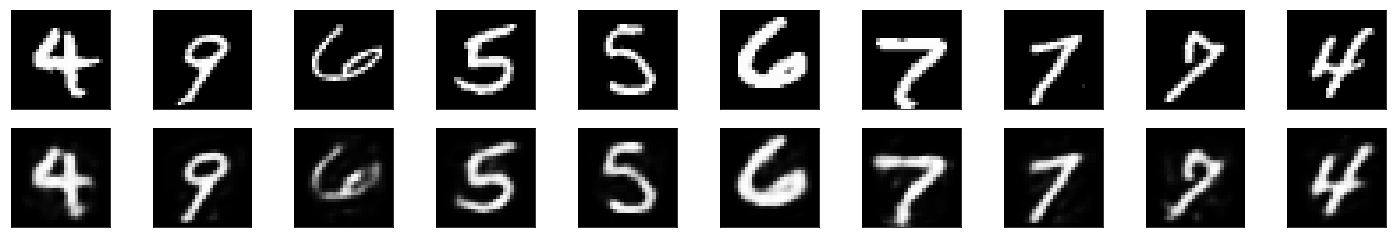

Loss: 3.196613
Epoch: 39/50


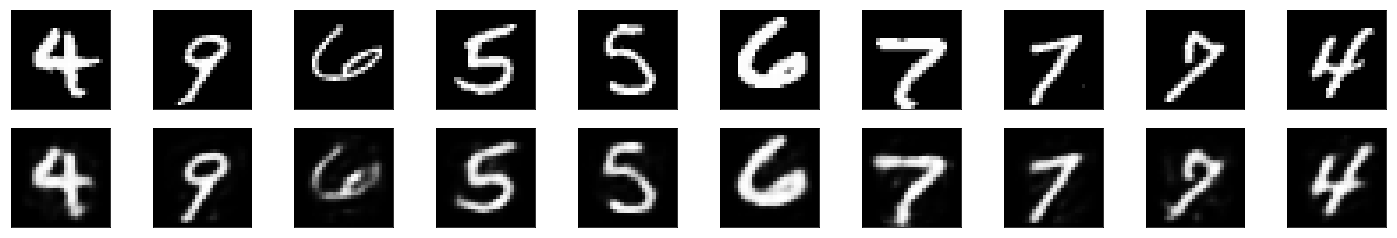

Loss: 3.152208
Epoch: 40/50


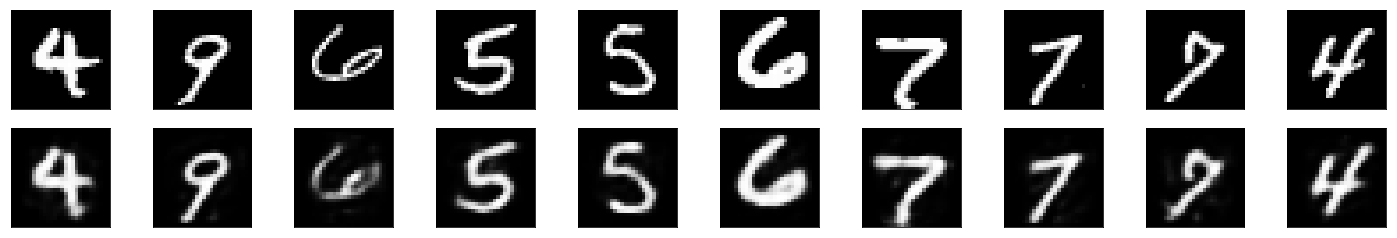

Loss: 3.110343
Epoch: 41/50


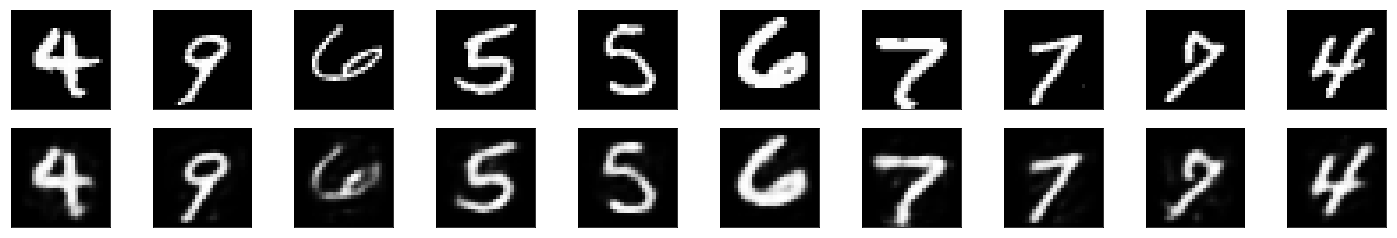

Loss: 3.070806
Epoch: 42/50


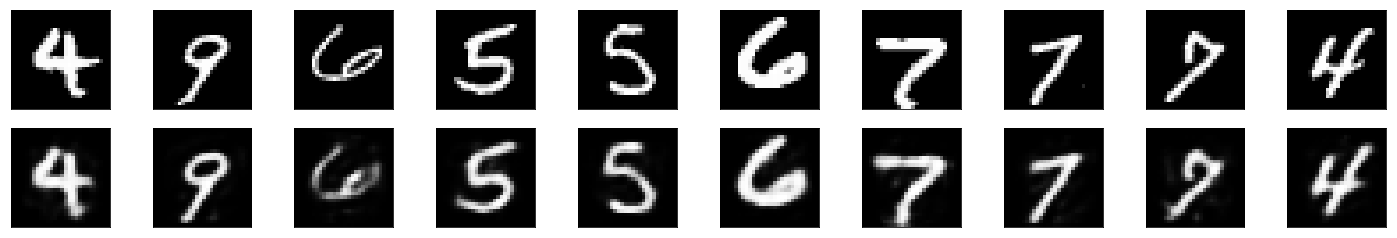

Loss: 3.033405
Epoch: 43/50


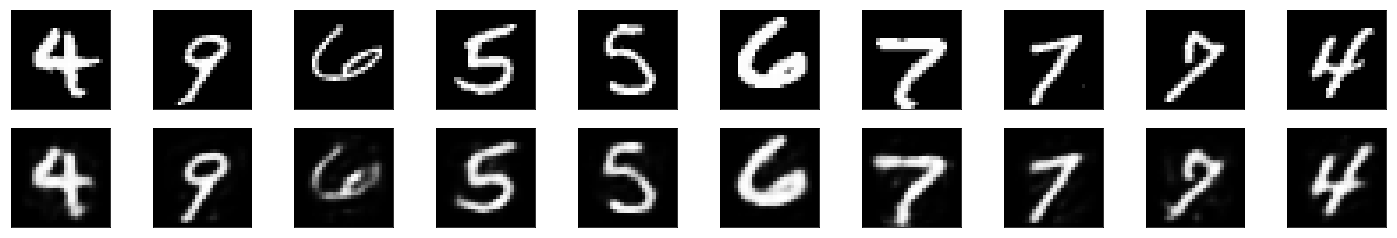

Loss: 2.997970
Epoch: 44/50


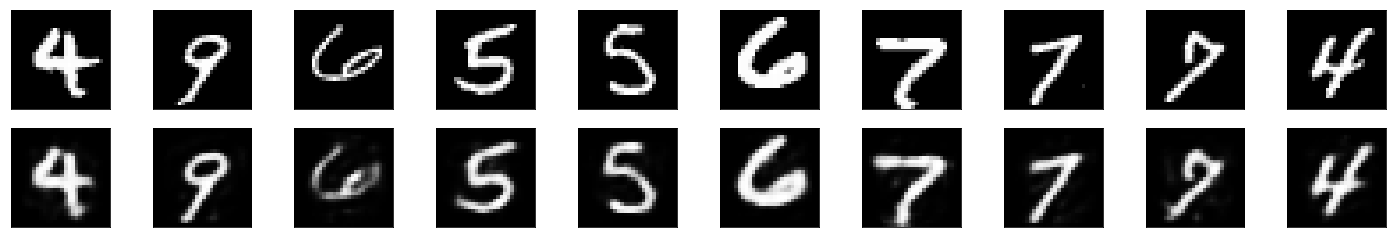

Loss: 2.964349
Epoch: 45/50


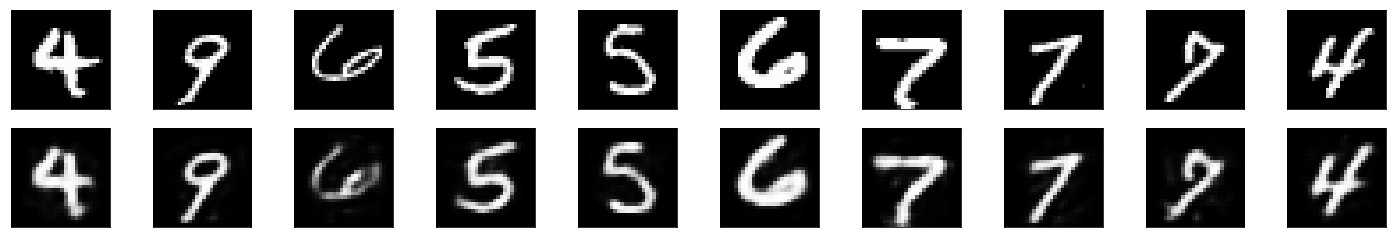

Loss: 2.932406
Epoch: 46/50


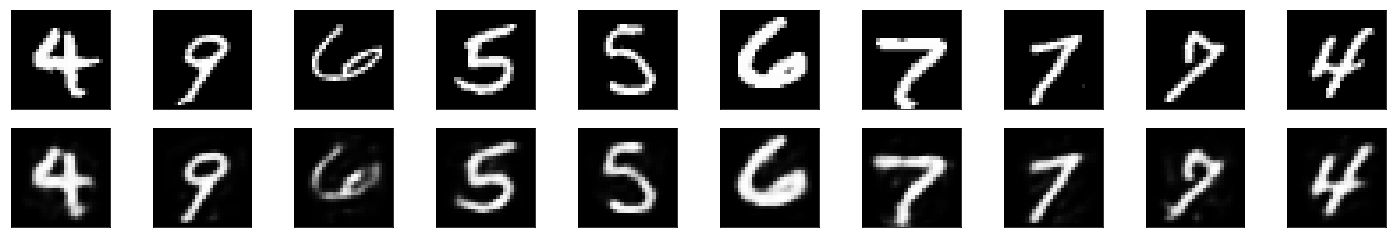

Loss: 2.902016
Epoch: 47/50


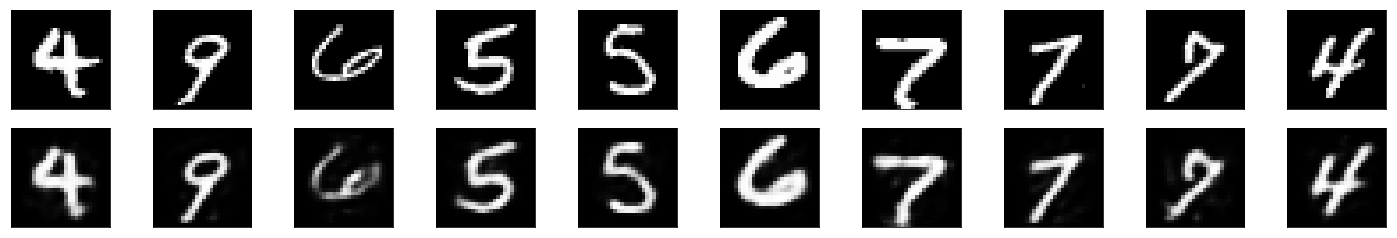

Loss: 2.873068
Epoch: 48/50


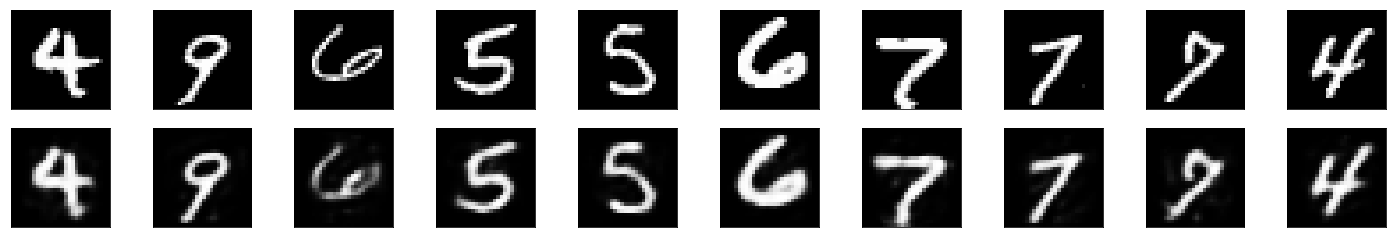

Loss: 2.845459
Epoch: 49/50


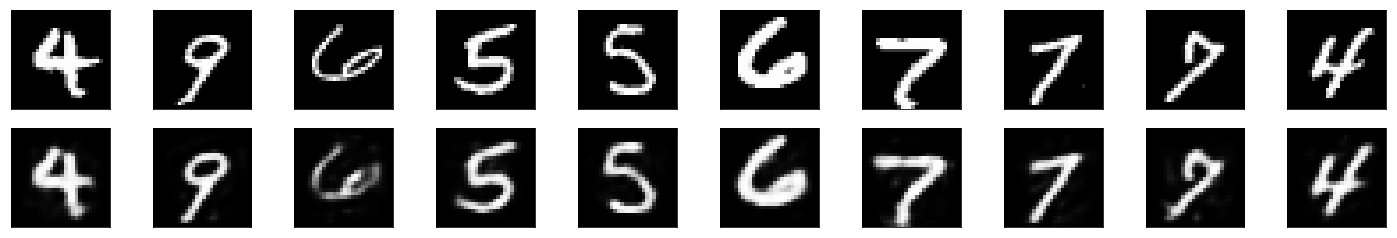

Loss: 2.819099
Epoch: 50/50


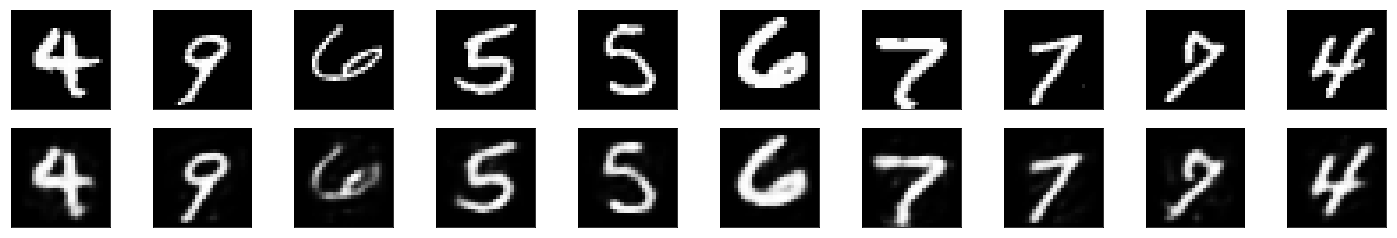

Loss: 2.793901


In [6]:
model = train(model, optimizer)

# Autoencoder on Unseen data

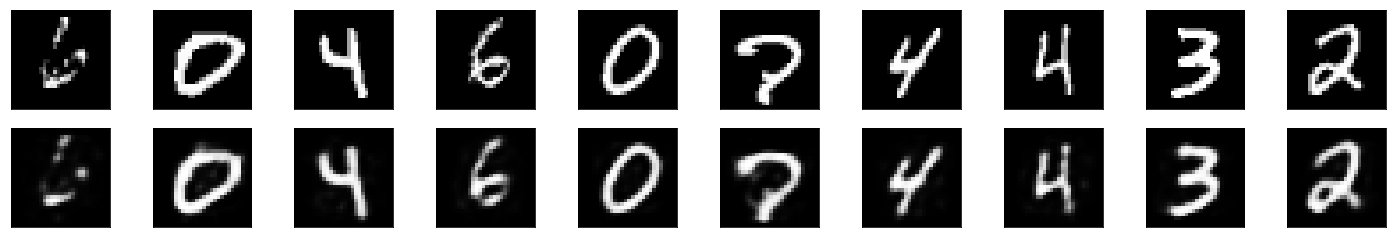

In [7]:
x_test, _ = testloader[0]
out_test = model.forward(x_test)
out_test = out_test.reshape(out_test.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

visualize(x_test, out_test)

# Denoising Autoencoder

In [8]:
x_test, _ = testloader[3]
noise_factor = 0.2
noise = noise_factor * np.random.randn(*(x_test.shape))
x_test += noise
x_test = np.clip(x_test, 0, 1)

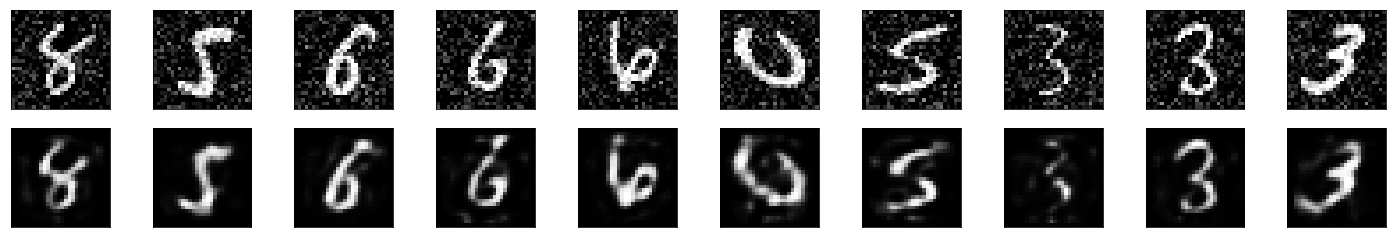

In [9]:
out_test = model.forward(x_test)
out_test = out_test.reshape(out_test.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

visualize(x_test, out_test)